# Using `pyND.gbt`

Introduction here

In [7]:
# Typical imports here
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [8]:
%load_ext autoreload
%autoreload 2
from pyND.gbt import GBTspec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading GBT spectra from GBTIDL ASCII output

In [27]:
input_filename = 'data/RBS2055_GBT.dat'
x = GBTspec.from_ascii(input_filename)

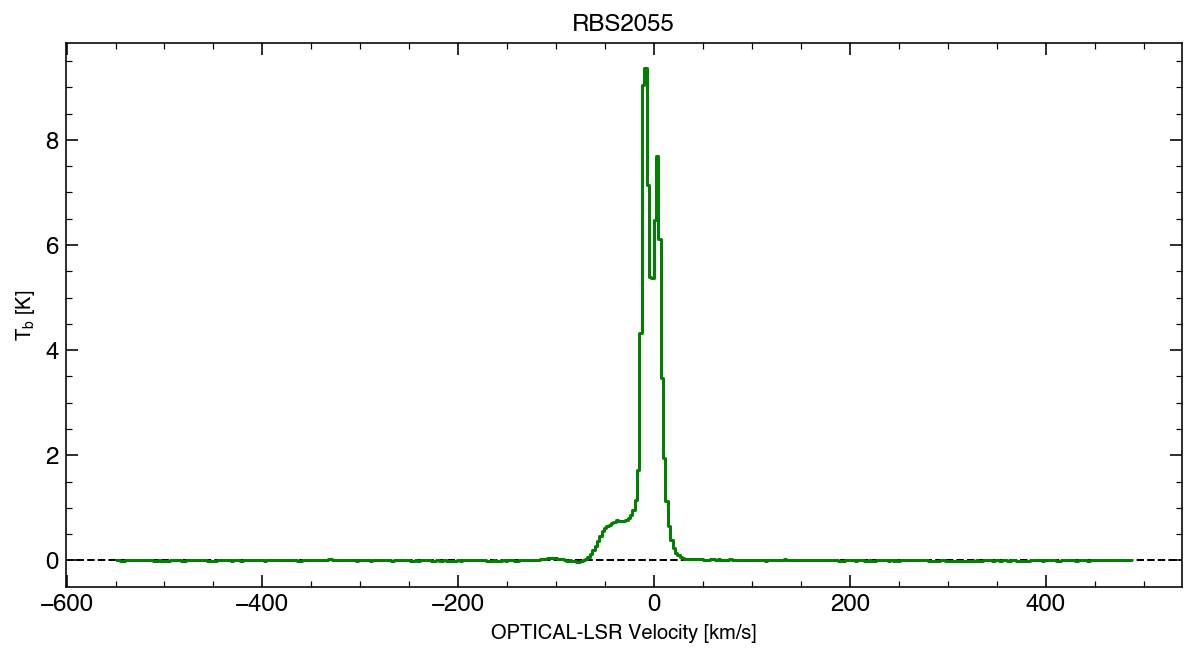

In [28]:
x.plotspectrum()

## Loading GBT spectra from GBTIDL FITS format

Loading from a GBT FITS file requires an object name.

In [12]:
input_filename = 'data/AMIGA-GBT.fits'
object_name = 'RBS2055'
y = GBTspec.from_GBTIDL(input_filename,object_name)

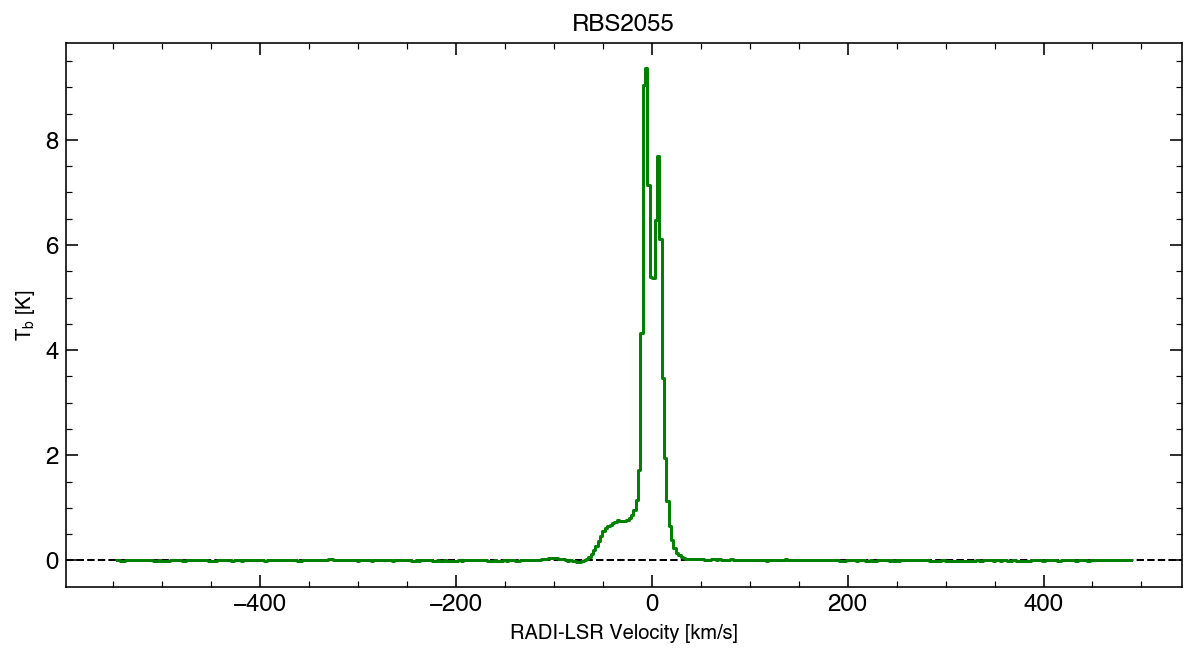

In [13]:
y.plotspectrum()

# Examining the metadata

In [29]:
x.object,x.RA,x.DEC,x.veldef,x.filename

('RBS2055',
 357.9699958333333,
 26.325738333333334,
 'OPTICAL-LSR',
 '/Users/howk/Dropbox (KODIAQ)/python/pyND/gbt/docs/data/RBS2055_GBT.dat')

## Compare the two results

In this example, the results are slightly different, as the ASCII data are saved in the OPTICAL-LSR frame, while the GBTIDL data are saved using the RADI-LSR, the radio astronomical definition of the LSR.

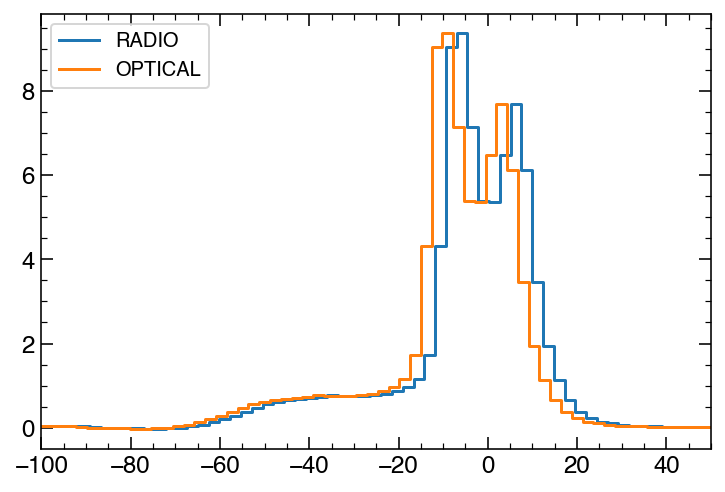

In [56]:
plt.plot(y.velocity,y.Tb,drawstyle='steps-mid',label='RADIO')
plt.plot(x.velocity,x.Tb,drawstyle='steps-mid',label='OPTICAL')
plt.xlim(-100,50)
plt.legend(loc='upper left')

## Change OPTICAL to RADIO

**N.B. This approach doesn't seem to shift the spectra by enough to be the source of the difference...**

In [62]:
light_speed = np.float64(c.c.to('m/s').value)
nu0 = np.float64(1420405800.0000000000000000000)

# First calculate frequency from optical:
nu = (nu0/(1+(x.velocity)*1000./light_speed))
# Calculate radio definition
vrad =light_speed*((nu0-nu)/nu0)/1000.

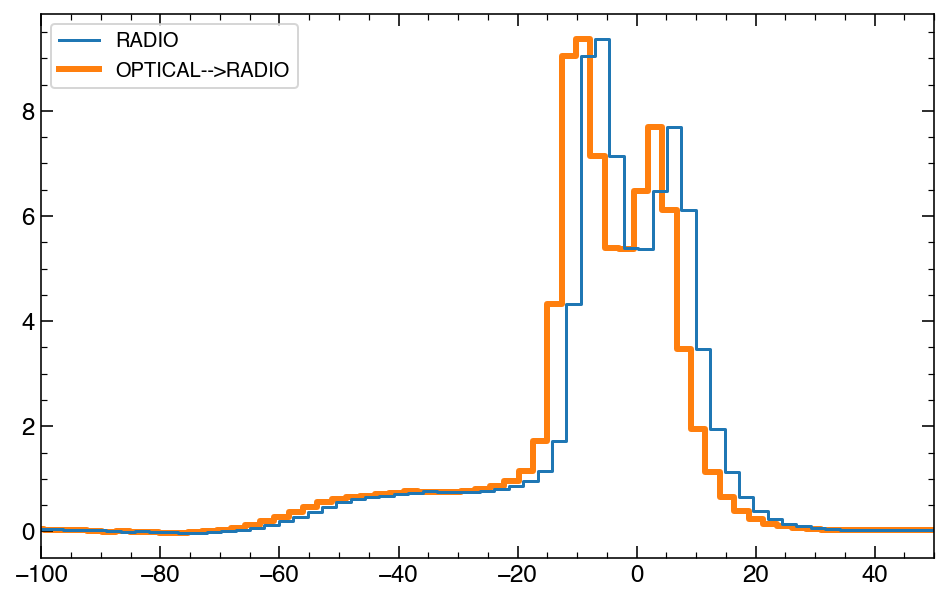

In [64]:
plt.figure(figsize=(8,5))
plt.plot(y.velocity,y.Tb,drawstyle='steps-mid',label='RADIO')
plt.plot(vrad,x.Tb,drawstyle='steps-mid',label='OPTICAL-->RADIO',zorder=0,linewidth=3)
plt.xlim(-100,50)
plt.legend(loc='upper left')

## Change RADIO to OPTICAL

In [41]:
light_speed = (c.c.to('m/s').value)
nu0 = (1420405800.0000000000000000000)

# Frequency from radio:
nu = nu0*(1-(x.velocity)*1000./light_speed)
# Calculate radio definition
vopt = (light_speed/1000.)*((nu0-nu)/nu)


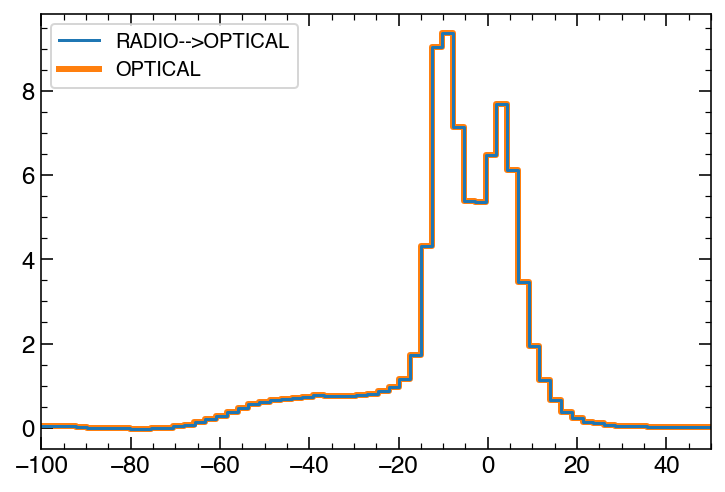

In [42]:
plt.plot(vopt,y.Tb,drawstyle='steps-mid',label='RADIO-->OPTICAL')
plt.plot(x.velocity,x.Tb,drawstyle='steps-mid',label='OPTICAL',zorder=0,linewidth=3)
plt.xlim(-100,50)
plt.legend(loc='upper left')

## Change RADIO to OPTICAL with built-in function

In [44]:
input_filename = 'data/AMIGA-GBT.fits'
object_name = 'RBS2055'
y = GBTspec.from_GBTIDL(input_filename,object_name)

input_filename = 'data/RBS2055_GBT.dat'
x = GBTspec.from_ascii(input_filename)

x.change_veldef()



plt.plot(y.velocity,y.Tb,drawstyle='steps-mid',label='RADIO-->OPTICAL')
plt.plot(x.velocity,x.Tb,drawstyle='steps-mid',label='OPTICAL',zorder=0,linewidth=3)
plt.xlim(-100,50)
plt.legend(loc='upper left')